In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plot_utils import grid_plot

import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

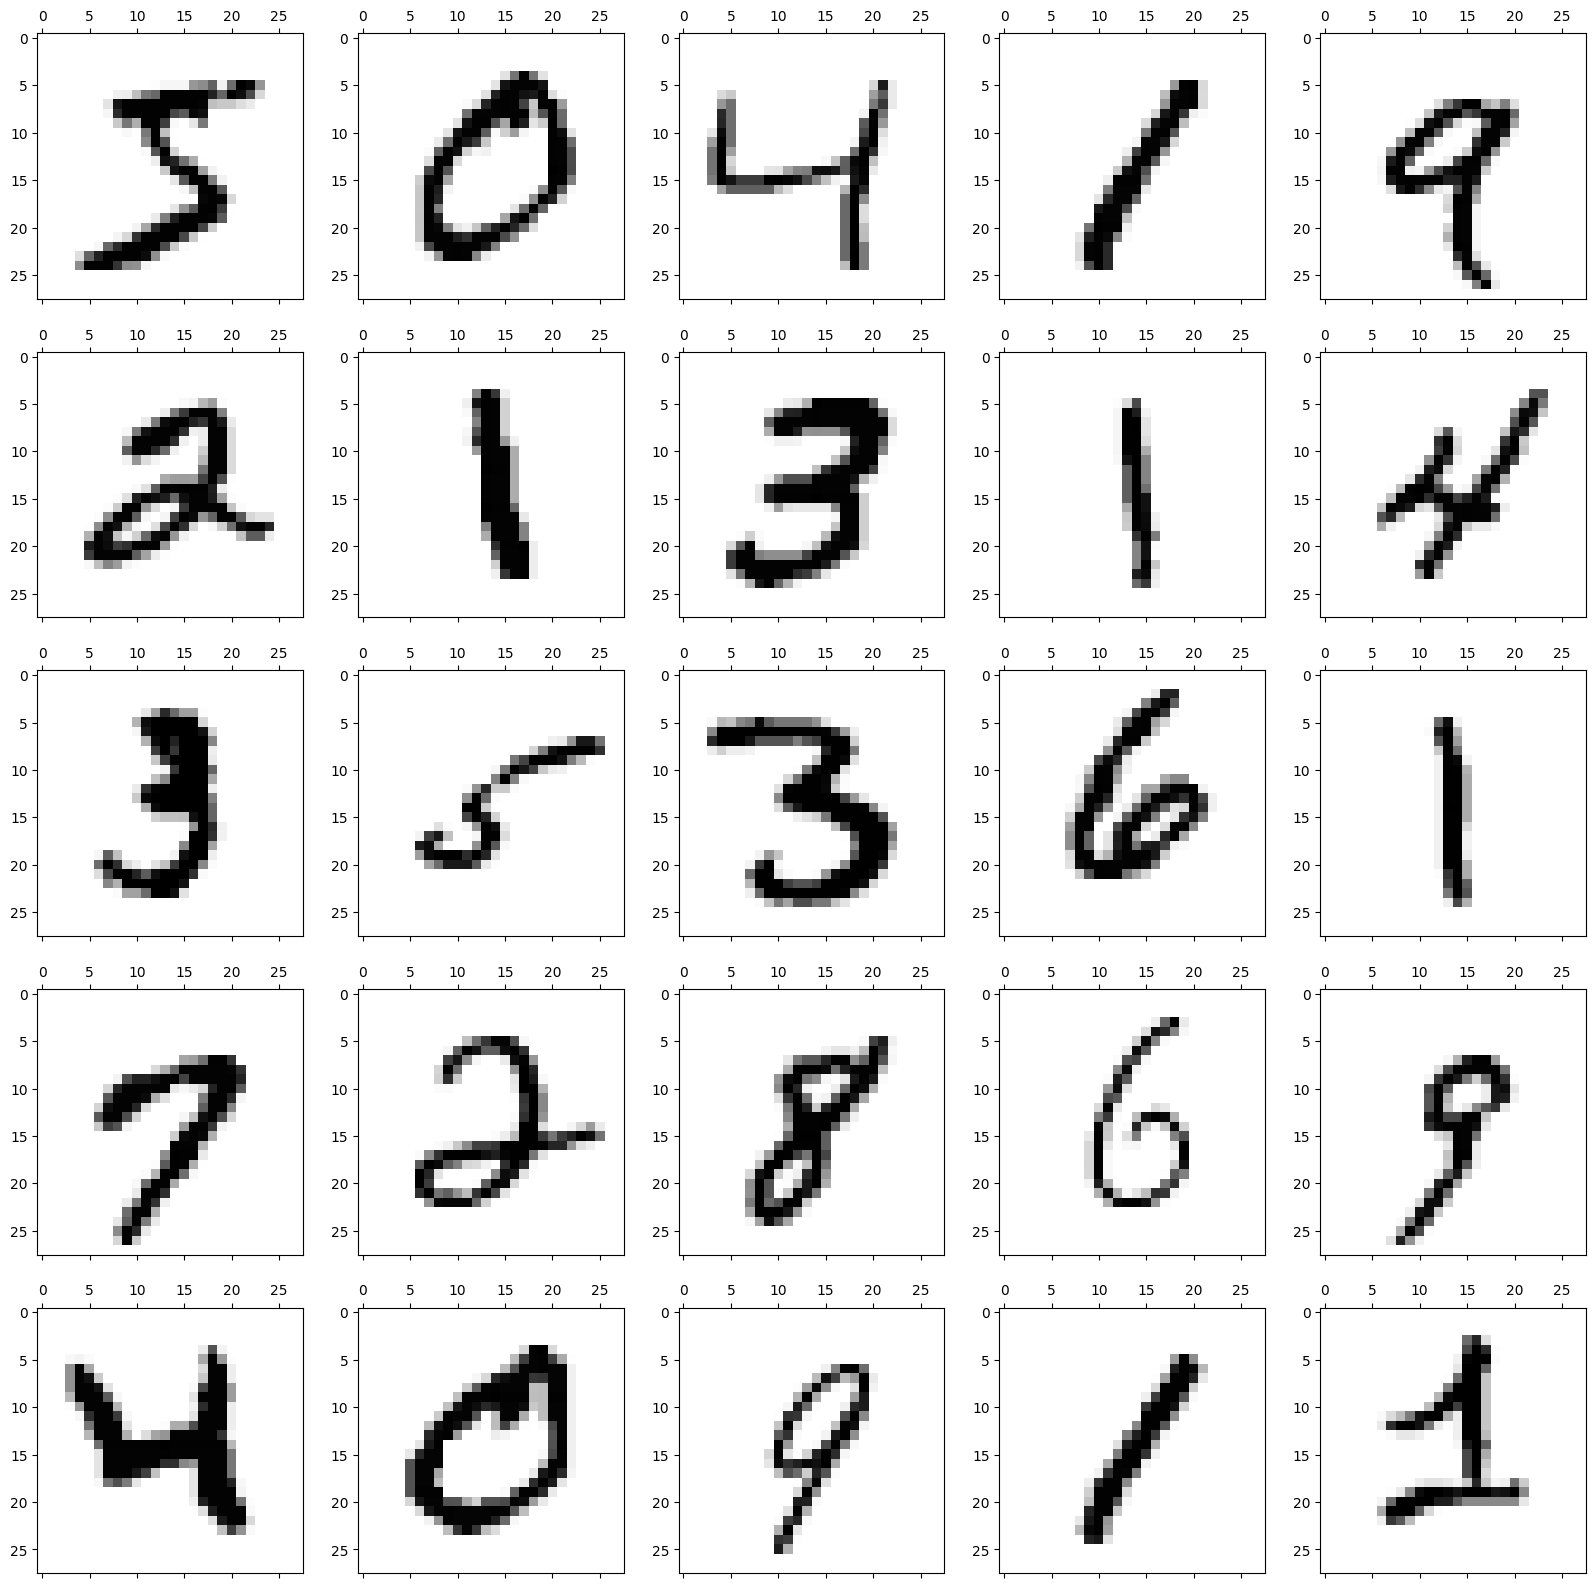

In [3]:
def plot_pc(ax, num, index):
    num_grid = num.reshape(28, -1)

    ax.matshow(num_grid, cmap='Greys')

grid_plot(X_train[0:5*5], 5, 5, plot_pc)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
pca.fit(X_train)

PCA(n_components=0.95)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

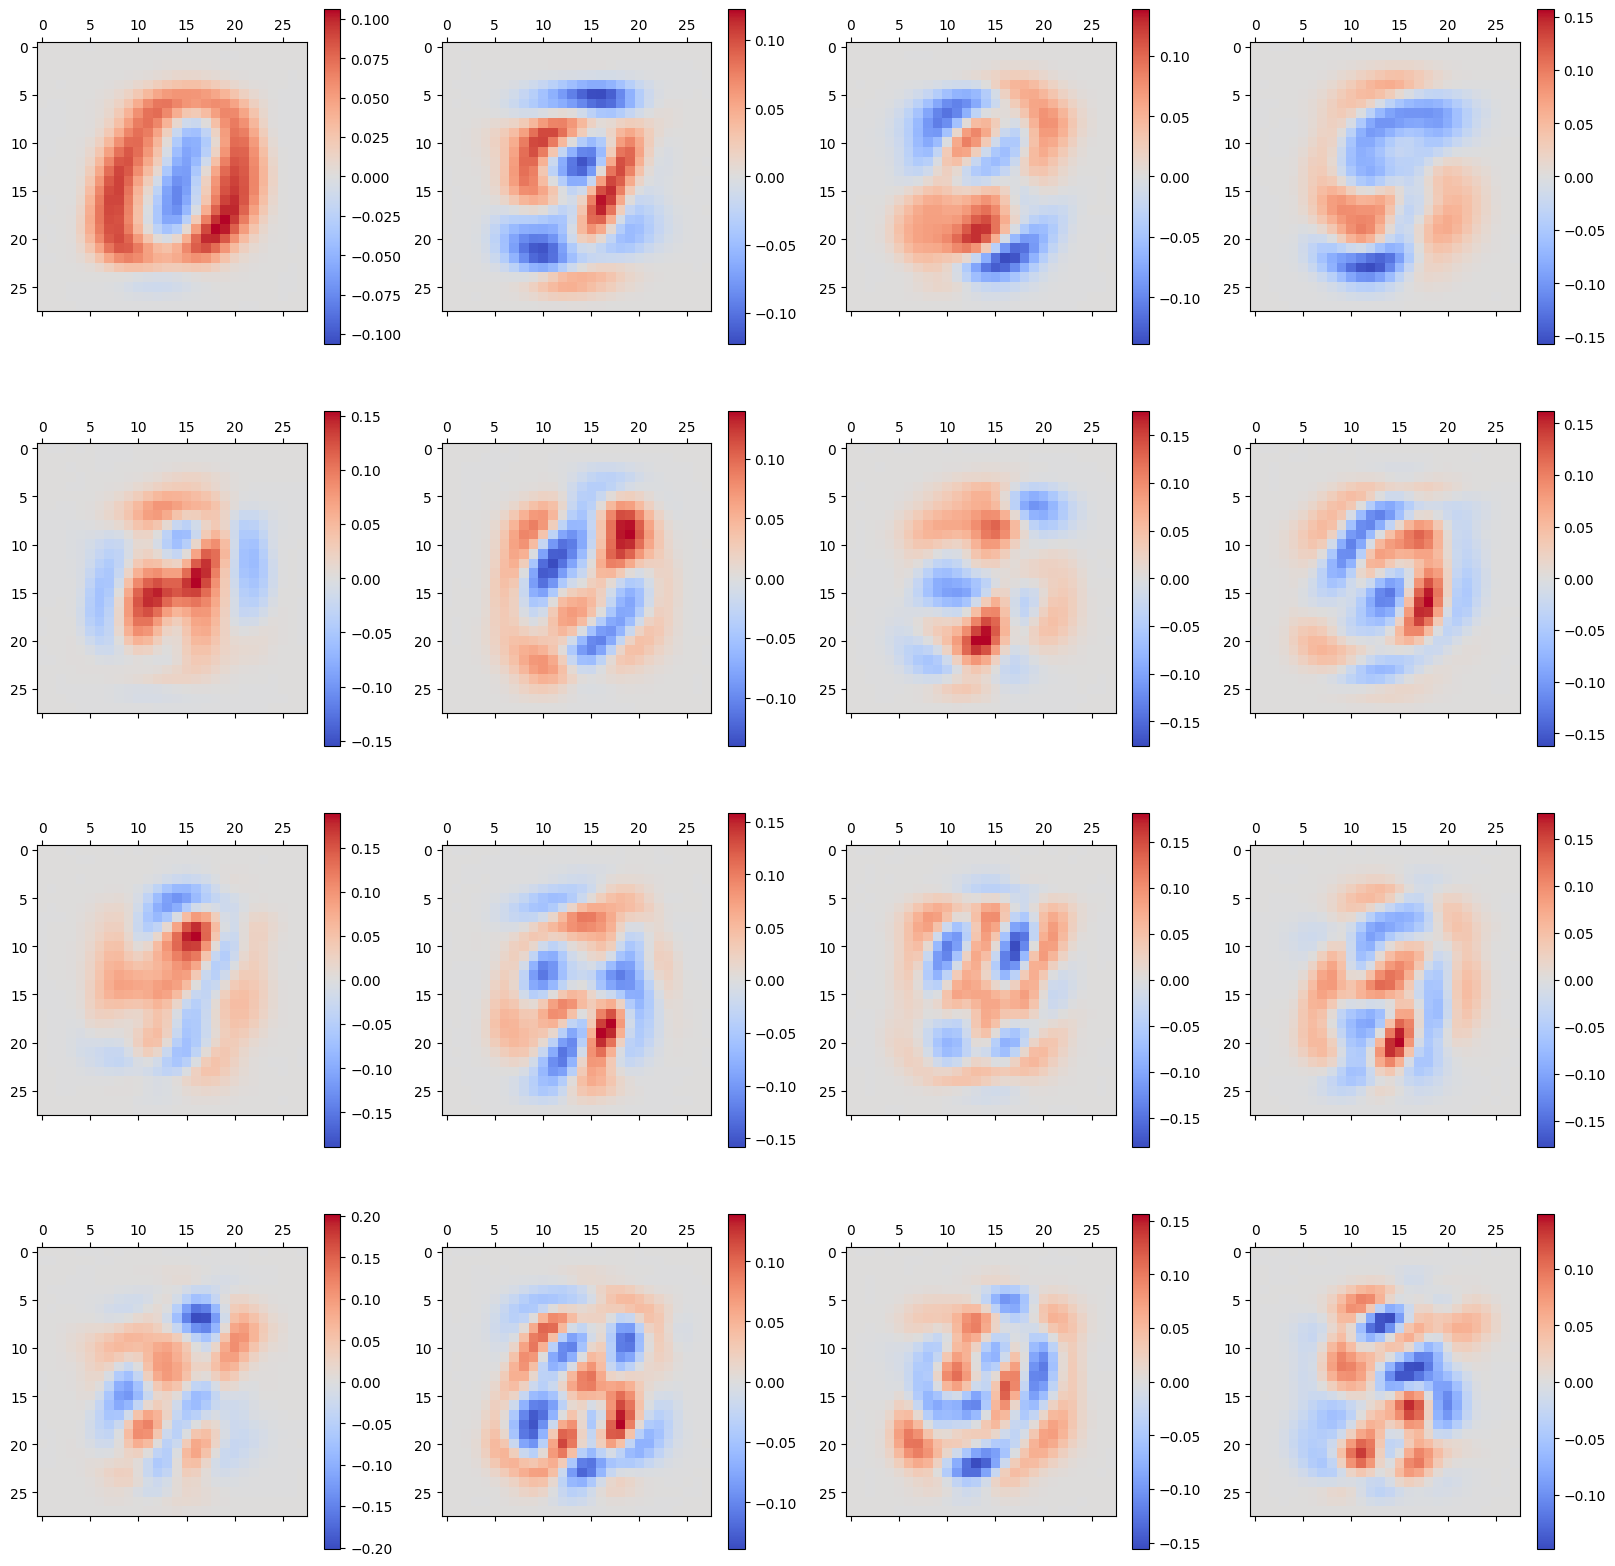

In [5]:
from matplotlib.colors import CenteredNorm

def plot_pc(ax, pc, index):
    pc_grid = pc.reshape(28, -1)

    axImg = ax.matshow(pc_grid, cmap='coolwarm', norm=CenteredNorm())
    plt.colorbar(axImg)

grid_plot(pca.components_[0:4*4], 4, 4, plot_pc)

In [6]:
X_train_pca, X_test_pca = pca.transform(X_train), pca.transform(X_test)


In [7]:

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=504, max_depth=4)

tree_clf.fit(X_train_pca, y_train)

tree_clf.score(X_train_pca, y_train), tree_clf.score(X_test_pca, y_test)

(0.5103166666666666, 0.5158)

In [8]:
from plot_utils import visualize_tree

visualize_tree(tree_clf, None, [str(i) for i in range(10)]).view()

'C:\\Users\\oih\\AppData\\Local\\Temp\\tmped1i_p82.dot.pdf'

In [9]:
importances = zip(range(len(X_train_pca[0])), tree_clf.feature_importances_) #pairs up feature names with performance score
sorted(importances, key=lambda p: -p[1])[:10]

[(0, 0.2864588636633002),
 (1, 0.23542939711685804),
 (3, 0.1872564237271149),
 (6, 0.14277913054547622),
 (4, 0.13306277810201048),
 (9, 0.006184695843875695),
 (5, 0.004295891749026521),
 (33, 0.0027337116057285366),
 (26, 0.0017991076466094087),
 (2, 0.0)]

In [10]:
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=504, n_jobs=16)
rcf.fit(X_train_pca, y_train)
rcf.score( X_train_pca, y_train), rcf.score(X_test_pca, y_test)

(0.98045, 0.9328)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=504)
kmeans.fit(X_train_pca)

c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=504)

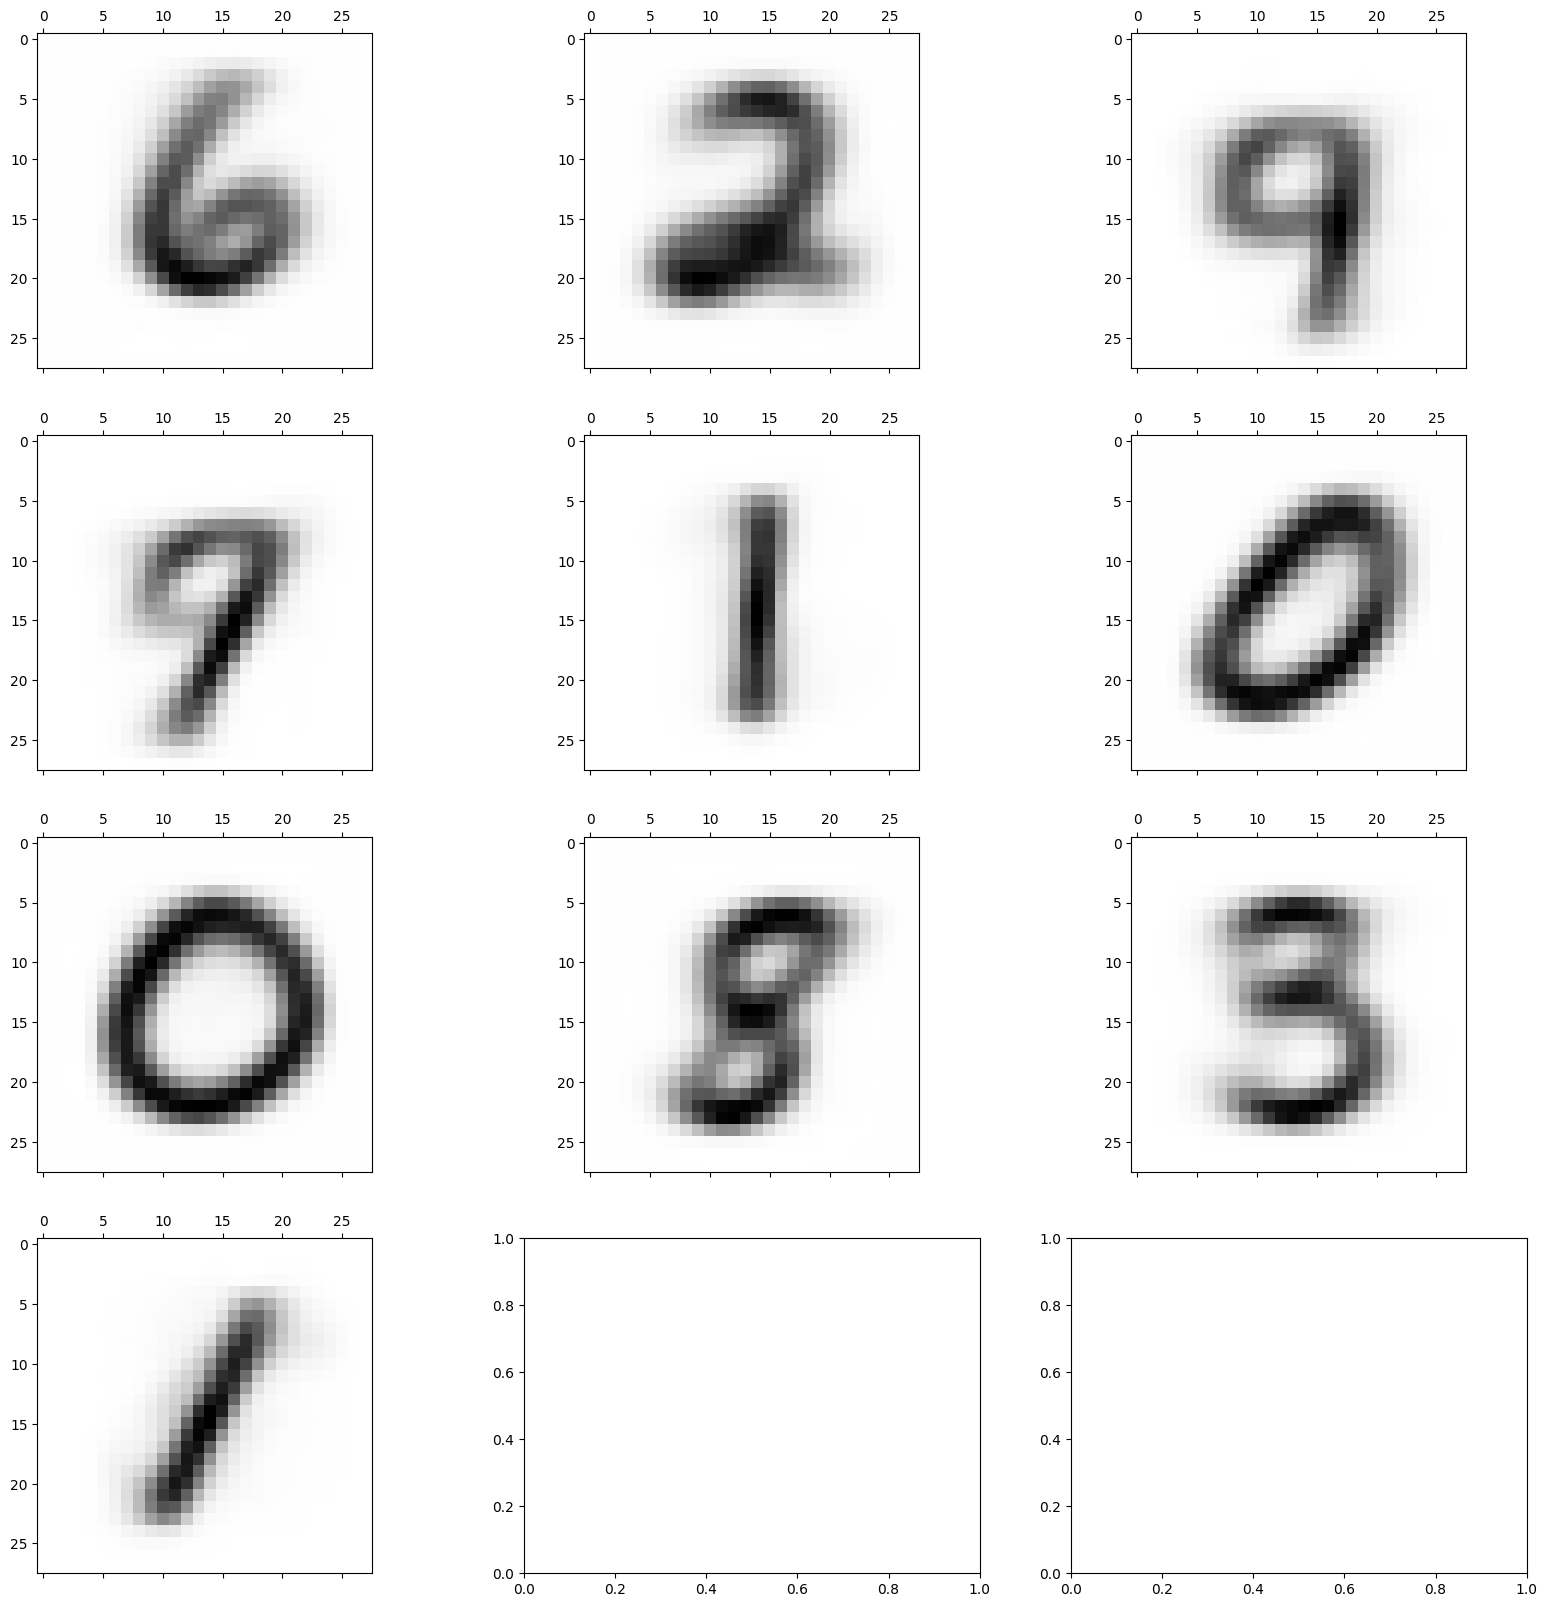

In [12]:
def plot_pc(ax, num, index):
    num_grid = num.reshape(28, -1)

    ax.matshow(num_grid, cmap='Greys')

axes = grid_plot(pca.inverse_transform(kmeans.cluster_centers_), 3, 4, plot_pc)


In [13]:
from itertools import groupby

cluster_x_y = zip(kmeans.predict(X_train_pca), y_train)
cluster_x_y = sorted(cluster_x_y, key = lambda cv: cv[0])
groups = groupby(cluster_x_y, key = lambda cv: cv[0])

def bag(vals):
  vals = sorted(vals)
  gs = groupby(vals)
  return [(val, len([*group])) for val, group in gs]

for cluster, group in groups:
  stats = bag([y for __, y in group])
  print(cluster, ': ', stats)


0 :  [('0', 181), ('1', 9), ('2', 212), ('3', 58), ('4', 166), ('5', 120), ('6', 4913), ('7', 4), ('8', 47), ('9', 7)]
1 :  [('0', 17), ('1', 9), ('2', 4195), ('3', 217), ('4', 37), ('5', 15), ('6', 86), ('7', 39), ('8', 55), ('9', 12)]
2 :  [('0', 37), ('1', 6), ('2', 174), ('3', 177), ('4', 3189), ('5', 375), ('6', 82), ('7', 1795), ('8', 194), ('9', 2903)]
3 :  [('0', 14), ('1', 9), ('2', 70), ('3', 49), ('4', 1940), ('5', 346), ('6', 1), ('7', 3773), ('8', 181), ('9', 2461)]
4 :  [('0', 3), ('1', 3717), ('2', 366), ('3', 426), ('4', 159), ('5', 161), ('6', 271), ('7', 327), ('8', 297), ('9', 239)]
5 :  [('0', 2506), ('2', 95), ('3', 120), ('4', 10), ('5', 244), ('6', 120), ('7', 14), ('8', 31), ('9', 19)]
6 :  [('0', 2793), ('2', 10), ('3', 19), ('4', 10), ('5', 65), ('6', 100), ('7', 15), ('8', 38), ('9', 38)]
7 :  [('0', 188), ('1', 10), ('2', 155), ('3', 1036), ('4', 21), ('5', 1526), ('6', 96), ('7', 10), ('8', 3454), ('9', 69)]
8 :  [('0', 163), ('1', 5), ('2', 329), ('3', 392

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(random_state=504, max_iter=1000)

lr.fit(X_train_pca, y_train)

lr.score(X_train_pca, y_train), lr.score(X_test_pca, y_test)

c:\Users\oih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.92665, 0.9234)

In [16]:
from sklearn.svm import SVC

X_small, y_small = X_train_pca[:6000], y_train[:6000]

svc = SVC(kernel='linear', decision_function_shape='ovr')
svc.fit(X_small, y_small)
svc.score(X_small, y_small)

1.0

In [17]:
svc.score(X_train_pca[6000:], y_train[6000:]), svc.score(X_test_pca, y_test)

(0.8931851851851852, 0.8975)

In [18]:
svc = SVC(kernel='poly', decision_function_shape='ovr')
svc.fit(X_small, y_small)
svc.score(X_small, y_small)


0.9956666666666667

In [19]:

svc.score(X_train_pca[6000:], y_train[6000:]), svc.score(X_test_pca, y_test)

(0.9580925925925926, 0.9586)

In [20]:
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(X_small, y_small)
svc.score(X_small, y_small)


0.9916666666666667

In [21]:

svc.score(X_train_pca[6000:], y_train[6000:]), svc.score(X_test_pca, y_test)


(0.9571111111111111, 0.959)

In [22]:
svc = SVC(kernel='sigmoid', decision_function_shape='ovr')
svc.fit(X_small, y_small)
svc.score(X_small, y_small)


0.9021666666666667

In [23]:

svc.score(X_train_pca[6000:], y_train[6000:]), svc.score(X_test_pca, y_test)


(0.8861111111111111, 0.8947)